### Ejercicio métricas para regresores

#### Siguiendo con la práctica del set de datos de los bluegills, calcula las diferentes métricas del rendimiento de los diferentes algoritmos que hemos visto para regresión y compáralas para decidir cuál es el modelo más adecuado.


#### En 1981, 78 diferentes peces bluegills fueron aleatoriamente caracterizados según su longitud y edad de un lago de Minnesota. Los investigadores midieron y grabaron los datos que se adjuntan. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import GridSearchCV


Abrimos el archivo de datos

In [2]:
datos = pd.read_csv("Datos mojarra americana .txt", sep = "\s")

C:\ProgramData\Anaconda3\lib\site-packages\pandas\util\_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


In [3]:
datos.head()

,age,length
0,1,67
1,1,62
2,2,109
3,2,83
4,2,91


In [4]:
datos.describe()

,age,length
count,78.000000,78.000000
mean,3.628205,143.602564
std,0.927347,24.136699
min,1.000000,62.000000
25%,3.000000,137.250000
50%,4.000000,150.000000
75%,4.000000,160.000000
max,6.000000,188.000000


In [5]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78 entries, 0 to 77
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   age     78 non-null     int64
 1   length  78 non-null     int64
dtypes: int64(2)
memory usage: 1.3 KB


Graficamos los datos

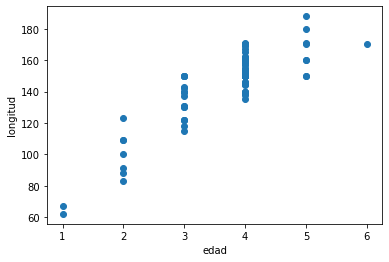

In [6]:
x = datos["age"]
y = datos["length"]

plt.scatter(x, y)
plt.xlabel("edad")
plt.ylabel("longitud")
plt.show()

<div style="background-color: rgb(100, 80, 140)">
<h1 style="color: rgb(255, 255, 255);padding: 20px;font-weight:bold;font-size:22px;"> Creación Modelos Linear Regression y Polinomial Regression
</h1>
</div>

### Modelo de regresión lineal

Primero dividivos los datos en los set de training y test usando la función test_train_split de s

In [7]:
X = datos["age"].to_numpy().reshape(-1,1)
y = datos["length"].to_numpy()

In [8]:
#Un 80% de los datos es de entrenamiento y el 20% restante de test
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

Creamos el modelo

In [9]:
lr = LinearRegression() # Creamos el objeto de Regresión Linear

In [10]:
model = lr.fit(x_train, y_train) # Entrenamos nuestro modelo
model.coef_, model.intercept_ # Obtenemos el coeficiente de regresión y el punto de corte con el eje y

(array([22.52808219]), 61.83493150684927)

En nuestro caso la ecuación calculada sería:

y = 22.52808219x + 61.83493150684927

In [11]:
y_predicted = lr.predict(x_train) #Usando la ecuación creada calculamos la variable de salida y para los datos de training

#### Usamos ahora los valores del set test

In [12]:
y_test_predicted = lr.predict(x_test)

### Graficamos los datos

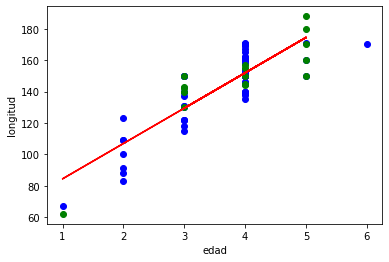

In [13]:
plt.scatter(x_train, y_train, color = "b")
plt.scatter(x_test, y_test, color = "g")
plt.plot(x_test, y_test_predicted, "r")
plt.xlabel("edad")
plt.ylabel("longitud")
plt.show()

In [14]:
rmse_test_lr = mean_squared_error (y_test, y_test_predicted, squared = False)
rmse_test_lr

12.675742030207651

In [15]:
mse_test_lr = mean_squared_error (y_test, y_test_predicted)
mse_test_lr

160.6744360163728

In [16]:
mae_test_lr = mean_absolute_error (y_test, y_test_predicted)
mae_test_lr

10.480607876712334

In [17]:
r2_test_lr = r2_score (y_test, y_test_predicted)
r2_test_lr

0.7717642014194238

In [18]:
n = datos["age"].size
k = 1

def adjusted_r2(r2, n, k):
    ad_r2 = (1 - (((n-1)/(n-k-1)) * (1 - r2)))
    return ad_r2

In [91]:
ad_r2_test_lr = adjusted_r2 (r2_test_lr, n, k)
ad_r2_test_lr

0.7687610988065215

### Probamos con un modelo de regresión polinomial

Primero debemos definir el grado del polinomio, para ello hemos importado de la librería scikit learn las características polinomiales o PolynomialFeatures, y procedemos a definir el grado. Empezamos con una función cuadrática.

In [20]:
poly_2 = PolynomialFeatures (2)

Definido el grado se procede a transformar las características de existentes, en este caso tanto x_train como x_test en características de mayor grado, para ello utilizamos el polinomio definido anteriormente y lo entrenamos a estos datos

In [21]:
x_train_poly = poly_2.fit_transform(x_train)

Definimos el algoritmo en nuestro modelo, que en este caso sería LinearRegression, con esta misma instrucción se puede calcular el modelo de Regresión Polinomial.

In [22]:
model2 = lr.fit(x_train_poly, y_train) # Entrenamos nuestro modelo
model2.coef_, model2.intercept_ # Obtenemoslos coeficientes y el punto de corte con el eje y

(array([ 0.        , 55.00027105, -4.85354174]), 11.4777737621975)

En este caso la ecuación quedaría:
y = 55.00027105 x -4.85354174 x2 - 11.4777737621975

In [23]:
y_train_poly_predicted = model2.predict (x_train_poly)

Probamos la ecuación con los valores del set test. Primero transformamos los datos de x

In [24]:
x_test_poly = poly_2.fit_transform(x_test)

In [25]:
y_test_poly_predicted = model2.predict(x_test_poly)

In [26]:
rmse_test_poly2 = mean_squared_error(y_test, y_test_poly_predicted, squared = False)
rmse_test_poly2

10.510839421666384

In [27]:
mse_test_poly2 = mean_squared_error (y_test, y_test_poly_predicted)
mse_test_poly2

110.47774534805612

In [28]:
mae_test_poly2 = mean_absolute_error (y_test, y_test_poly_predicted)
mae_test_poly2

8.541685489700022

In [29]:
r2_test_poly2 = r2_score (y_test, y_test_poly_predicted)
r2_test_poly2

0.8430679014032718

In [93]:
ad_r2_test_poly2 = adjusted_r2 (r2_test_poly2, n, k)
ad_r2_test_poly2

0.8410030053691043

Usando la ecuación que tenemos (y = 55.00027105 x -4.85354174 x2 - 11.4777737621975) creamos una linea con 100 puntos, que usaremos para superponerla en la gráfica junto con nuestros datos

In [31]:
puntos = np.linspace(1, 6, 100).reshape (-1, 1)
puntos_poly = poly_2.fit_transform (puntos)
y_puntos_poly = model2.predict (puntos_poly)

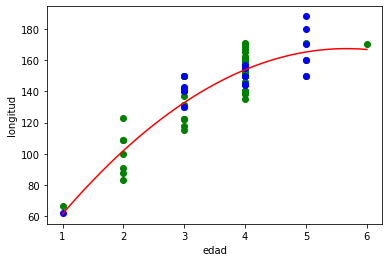

In [32]:
plt.scatter(x_train, y_train, color = "g")
plt.scatter (x_test, y_test, color = "b")
plt.plot (puntos, y_puntos_poly, "r")
plt.xlabel("edad")
plt.ylabel("longitud")
plt.show()

Si queremos comparar las métricas de los dos modelos con los datos de test

Podemos crear un modelo con un polinomio de mayor grada siguiendo los mismos pasos

In [33]:
poly_3 = PolynomialFeatures (3)

In [34]:
x_train_poly3 = poly_3.fit_transform(x_train)

In [35]:
model3 = lr.fit(x_train_poly3, y_train)

In [36]:
x_test_poly3 = poly_3.fit_transform (x_test)

In [37]:
puntos_poly3 = poly_3.fit_transform (puntos)
y_puntos_poly3 = model3.predict (puntos_poly3)

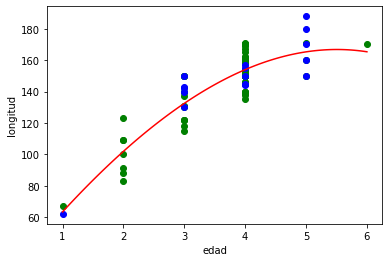

In [38]:
plt.scatter(x_train, y_train, color = "g")
plt.scatter (x_test, y_test, color = "b")
plt.plot (puntos, y_puntos_poly3, "r")
plt.xlabel("edad")
plt.ylabel("longitud")
plt.show()

In [39]:
y_test_poly3 = model3.predict(x_test_poly3)

In [40]:
rmse_test_poly3 = mean_squared_error (y_test, y_test_poly3, squared = False)
rmse_test_poly3

10.594325981745554

In [42]:
mse_test_poly3 = mean_squared_error (y_test, y_test_poly3)
mse_test_poly3

112.2397430074889

In [44]:
mae_test_poly3 = mean_absolute_error (y_test, y_test_poly3)
mae_test_poly3

8.662342040188477

In [45]:
r2_test_poly3 = r2_score (y_test, y_test_poly3)

In [94]:
ad_r2_test_poly3 = adjusted_r2 (r2_test_poly3, n, k)
ad_r2_test_poly3

0.8384671794295553

In [47]:
resultados = pd.DataFrame( {"Test_RSME": [rmse_test_lr, rmse_test_poly2, rmse_test_poly3], 
                            "Test_r2": [r2_test_lr, r2_test_poly2, r2_test_poly3]}, 
                          index = ["Regresión lineal", "Regresión polinómica grado 2", "Regresión polinómica grado 3"])
resultados

,Test_RSME,Test_r2
Regresión lineal,12.675742,0.771764
Regresión polinómica grado 2,10.510839,0.843068
Regresión polinómica grado 3,10.594326,0.840565


## Resultado

Si prestamos atención a los parámetros RSME y R2 para los tres modelos vemos que la RMSE más baja y la R2 más alta son para el modelo de regresión polinómica de grado 2. Por lo que si queremos estimar la longitud de un pez atendiendo a su edad aplicaríamos la fórmula:

y = 55.00027105 x -4.85354174 x2 - 11.4777737621975

longitud = 55.00027105 edad -4.85354174 edad2 - 11.4777737621975


## Nota

Hay que tener en cuenta que si cambiamos los datos de training y test este resultado puede verse afectado, ya que el dataset es muy pequeño. Habría que usar una validación cruzada para estimar mejor el rendimiento del modelo.

<div style="background-color: rgb(100, 80, 140)">
<h1 style="color: rgb(255, 255, 255);padding: 20px;font-weight:bold;font-size:22px;"> Creación Modelos Support Vector Regressor
</h1>
</div>

### Probamos el modelo SVR con el kernel "rbf" y GridSearchCV

In [51]:
from sklearn.svm import SVR

In [52]:
grid = GridSearchCV (estimator = SVR(kernel = "rbf"), 
                     param_grid = { "C": [1,  10, 100, 1000],"epsilon" : [0.001, 0.01, 0.1, 1],"gamma" : [0.001, 0.01, 0.1, 1]},
                     cv = 5,
                     scoring = "neg_mean_squared_error")


In [53]:
svr_rbf_grid = grid.fit(x_train, y_train)

print (grid.best_params_)

{'C': 1000, 'epsilon': 1, 'gamma': 0.01}


In [54]:
y_test_rbf_grid_pred = svr_rbf_grid.predict(x_test)

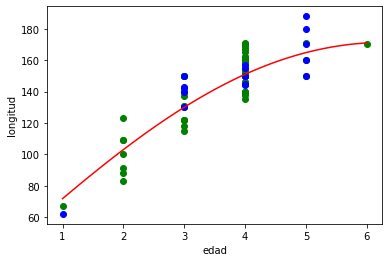

In [55]:
plt.scatter(x_train, y_train, color = "g")
plt.scatter(x_test, y_test, color = "b")
puntos_rbf_grid = svr_rbf_grid.predict (puntos)
plt.plot(puntos, puntos_rbf_grid, "r")
plt.xlabel("edad")
plt.ylabel("longitud")
plt.show()

In [56]:
rmse_rbf_grid = mean_squared_error (y_test, y_test_rbf_grid_pred, squared = False)
rmse_rbf_grid

11.40944026684951

In [57]:
mse_rbf_grid = mean_squared_error (y_test, y_test_rbf_grid_pred)
mse_rbf_grid

130.175327202807

In [58]:
mae_rbf_grid = mean_absolute_error (y_test, y_test_rbf_grid_pred)
mae_rbf_grid

9.493874788134523

In [59]:
r2_score_rbf_grid = r2_score (y_test, y_test_rbf_grid_pred)
r2_score_rbf_grid

0.8150877607151338

In [60]:
ad_r2_rbf_grid = adjusted_r2 (r2_score_rbf_grid, n, k)
ad_r2_rbf_grid

0.8126547049350697

### Probamos el modelo SVR con el kernel "linear" y GridSearchCV

In [61]:
grid = GridSearchCV (estimator = SVR(kernel = "linear"), 
                     param_grid = { "C": [1,  10, 100, 1000]},
                     cv = 5,
                     scoring = "neg_mean_squared_error")

In [62]:
svr_linear_grid = grid.fit (x_train, y_train)
print (svr_linear_grid.best_params_)

{'C': 10}


In [63]:
y_test_linear_grid_pred = svr_linear_grid.predict (x_test)

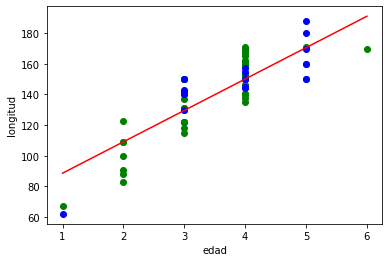

In [64]:
plt.scatter(x_train, y_train, color = "g")
plt.scatter(x_test, y_test, color = "b")
puntos_linear_grid = svr_linear_grid.predict (puntos)
plt.plot(puntos, puntos_linear_grid, "r")
plt.xlabel("edad")
plt.ylabel("longitud")
plt.show()

In [65]:
rmse_linear_grid = mean_squared_error (y_test, y_test_linear_grid_pred, squared = False)
rmse_linear_grid

12.8170053054526

In [66]:
mse_linear_grid = mean_squared_error (y_test, y_test_linear_grid_pred)
mse_linear_grid

164.2756250000001

In [67]:
mae_linear_grid = mean_absolute_error (y_test, y_test_linear_grid_pred)
mae_linear_grid

10.331250000000006

In [68]:
r2_linear_grid = r2_score (y_test, y_test_linear_grid_pred)
r2_linear_grid

0.76664876262346

In [70]:
ad_r2_linear_grid = adjusted_r2 (r2_linear_grid, n, k)
ad_r2_linear_grid

0.7635783516053477

### Probamos el modelo SVR con el kernel "poly" y GridSearchCV

In [71]:
grid = GridSearchCV (estimator = SVR(kernel = "poly", degree = 3),
                     param_grid = { "C": [1,  10, 100, 1000], "epsilon" : [0.001, 0.01, 0.1, 1],"gamma" : [0.001, 0.01, 0.1, 1], "coef0" : [1] },
                     cv = 5,
                     scoring = "neg_mean_squared_error")


In [72]:
svr_poly_grid = grid.fit (x_train, y_train)
print (svr_poly_grid.best_params_)

{'C': 100, 'coef0': 1, 'epsilon': 0.1, 'gamma': 1}


In [73]:
y_test_poly_grid_pred = svr_poly_grid.predict (x_test)

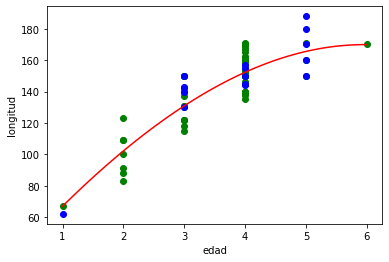

In [76]:
plt.scatter(x_train, y_train, color = "g")
plt.scatter(x_test, y_test, color = "b")
puntos_svr_poly_grid = svr_poly_grid.predict (puntos)
plt.plot(puntos, puntos_svr_poly_grid, "r")
plt.xlabel("edad")
plt.ylabel("longitud")
plt.show()

In [77]:
rmse_poly_grid = mean_squared_error (y_test, y_test_poly_grid_pred, squared = False)
rmse_poly_grid

10.906358627485817

In [85]:
mse_poly_grid = mean_squared_error (y_test, y_test_poly_grid_pred)
mse_poly_grid

118.94865851133432

In [87]:
mae_poly_grid = mean_absolute_error (y_test, y_test_poly_grid_pred)
mae_poly_grid

9.058238073855815

In [88]:
r2_poly_grid = r2_score (y_test, y_test_poly_grid_pred)
r2_poly_grid

0.8310350872328177

In [89]:
ad_r2_poly_grid = adjusted_r2 (r2_poly_grid, n, k)
ad_r2_poly_grid

0.8288118646964074

### Resultados

In [95]:
resultados = pd.DataFrame( {"RMSE": [rmse_test_lr, rmse_test_poly2, rmse_test_poly3, rmse_rbf_grid, rmse_linear_grid, rmse_poly_grid],
                            "MSE": [mse_test_lr, mse_test_poly2, mse_test_poly3, mse_rbf_grid, mse_linear_grid, mse_poly_grid],
                            "MAE" : [mae_test_lr, mae_test_poly2, mae_test_poly3, mae_rbf_grid, mae_linear_grid, mae_poly_grid],
                            "R2": [r2_test_lr, r2_test_poly2, r2_test_poly3, r2_score_rbf_grid, r2_linear_grid, r2_poly_grid],
                            "aR2" : [ad_r2_test_lr, ad_r2_test_poly2, ad_r2_test_poly3, ad_r2_rbf_grid, ad_r2_linear_grid, ad_r2_poly_grid]},
                          index = ["Regresión lineal", "Regresión polinómica grado 2", "Regresión polinómica grado 3",
                                   "SVR rbf GridSearchCV","SVR lineal GridSearchCV", "SVR polinómica GridSearchCV" ])
resultados

,RMSE,MSE,MAE,R2,aR2
Regresión lineal,12.675742,160.674436,10.480608,0.771764,0.768761
Regresión polinómica grado 2,10.510839,110.477745,8.541685,0.843068,0.841003
Regresión polinómica grado 3,10.594326,112.239743,8.662342,0.840565,0.838467
SVR rbf GridSearchCV,11.409440,130.175327,9.493875,0.815088,0.812655
SVR lineal GridSearchCV,12.817005,164.275625,10.331250,0.766649,0.763578
SVR polinómica GridSearchCV,10.906359,118.948659,9.058238,0.831035,0.828812


#### Según las métricas calculadas en la tabla de la celda anterior, el modelo con un RMSE menor y una R2 y R2 ajustada mayor sería el modelo de regresión polinómica de grado 2